In [ ]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd 

In [ ]:
from google.colab import drive 

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [ ]:
dataset = pd.read_csv('insurance1.csv')

In [ ]:
dataset.head()

,age,sex,healthy,children,smoker,region
0,19,0,1,0,1,3
1,18,1,1,1,0,2
2,28,1,0,3,0,2
3,33,1,0,0,0,1
4,32,1,1,0,0,1


In [ ]:
dataset.describe()

,age,sex,healthy,children,smoker,region
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,0.508621,1.091954,0.232759,1.497126
std,14.417015,0.500646,0.500646,1.192021,0.423198,1.104089
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,40.000000,1.000000,1.000000,1.000000,0.000000,2.000000
75%,53.000000,1.000000,1.000000,2.000000,0.000000,2.000000
max,64.000000,1.000000,1.000000,5.000000,1.000000,3.000000


In [ ]:
dataset.shape

(348, 6)

In [ ]:
X_val = dataset.iloc[:,:3]

In [ ]:
X_val

,age,sex,healthy
0,19,0,1
1,18,1,1
2,28,1,0
3,33,1,0
4,32,1,1
...,...,...,...
343,63,1,1
344,49,0,1
345,34,0,1
346,33,1,1


In [ ]:
Y_val = dataset.iloc[:,-2]

In [ ]:
Y_val

0      1
1      0
2      0
3      0
4      0
      ..
343    0
344    0
345    0
346    0
347    0
Name: smoker, Length: 348, dtype: int64

In [ ]:
reg0 = dataset.loc[Y_val==0]

In [ ]:
reg1 = dataset.loc[Y_val==1]

Text(0.5, 1.0, 'Scatter plot for smoker')

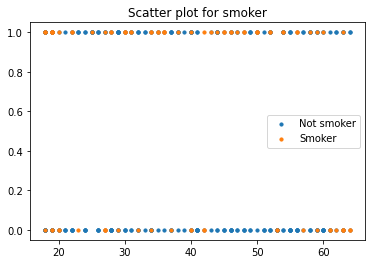

In [ ]:
plt.scatter(reg0.iloc[:, 0], reg0.iloc[:, 1], s=10, label='Not smoker')
plt.scatter(reg1.iloc[:, 0], reg1.iloc[:, 1], s=10, label='Smoker')

plt.legend()
plt.title('Scatter plot for smoker')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_val,Y_val,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(261, 3)
(87, 3)
(261,)
(87,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction_lr = lr.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(Y_test,prediction_lr)

In [ ]:
cm

array([[65,  0],
       [22,  0]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, prediction_lr))

Accuracy: 0.7471264367816092


In [ ]:
print("Precision:",metrics.precision_score(Y_test, prediction_lr))

Precision: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Recall:",metrics.recall_score(Y_test, prediction_lr))

Recall: 0.0
